# Binary Classification Breakoutroom

### Permasalahan

> Churn adalah salah satu peristiwa atau perilaku pelanggan beralih dari produk setelah (dalam jangka waktu tertentu) berlangganan produk. Produk dapat berupa barang atau jasa, seperti jaringan internet, penyedia telekomunikasi, dan sejenisnya. Dalam hal ini produk yang dianalisa adalah perusahaan telekomunikasi. Skema churn dapat dijelaskan dalam beberapa tahap. Tahap pertama, tahap ketika pelanggan berlangganan produk. Tahap kedua, yaitu rutinitas, atau perilaku pelanggan atau umpan balik pelanggan terhadap produk yang digunakan selama periode tertentu. Setelah itu, pada tahap ketiga, ada dua jenis, retensi (berlangganan kembali) atau churn (beralih atau berhenti berlangganan). Setiap perusahaan pasti ingin meminimalkan churn dan memaksimalkan retensi. Salah satu solusi yang dapat digunakan adalah dengan menggunakan prediksi churn pelanggan. Dengan ini, perusahaan dapat mengetahui karakteristik yang cenderung beralih atau berhenti berlangganan.

### Deskripsi Data

1.   Gender: Jenis kelamin pelanggan (Male, Female)
2.   Partner: Status pernikahan pelanggan (yes, no)
3.   Tenure: Lama beralangganan (integer; bulan)
4.   PhoneService: Apakah pelanggan menggunakan telfon (yes, no)
5.   PaperlessBilling:  Apakah pelanggan menggunakan paperless billing (yes, no)
6.   MonthlyCharges: Biaya bulanan (numeric; usd)
7.   Churn: Apakah pelanggan berhenti berlangganan atau tidak (yes, no)

> Dalam kasus ini kita akan melakukan prediksi Churn sebagai variabel respon.




## 1. Import Libraries and Data

IMPORT PACKAGES

In [ ]:
# Import Package
import os
import pandas as pd
import numpy as np

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Package untuk cleaning, modelling, dan evaluation model
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

IMPORT DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mendefinisikan data path
path = '/content/drive/My Drive/SMT_6/GCollab DS-1/Dataset - Logistic regression/'

In [ ]:
#Loading the dataset
df = pd.read_csv(path + "TelcoChurn.csv")
df.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,Female,Yes,1,No,Yes,29.85,No
1,Male,No,34,Yes,No,56.95,No
2,Male,No,2,Yes,Yes,53.85,Yes
3,Male,No,45,No,No,42.30,No
4,Female,No,2,Yes,Yes,70.70,Yes


## 2. Exploratory Data Analysis (EDA)

Lakukan eksplorasi data churn!

In [ ]:
#cek informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   Partner           7043 non-null   object 
 2   tenure            7043 non-null   int64  
 3   PhoneService      7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 385.3+ KB


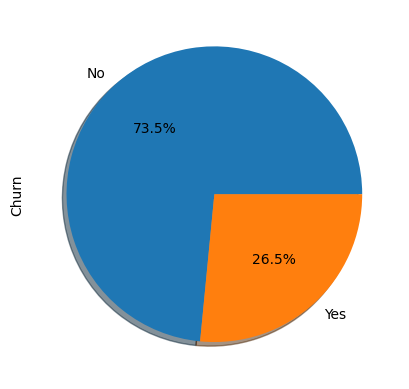

In [ ]:
#mencari perbandinagn class
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

In [ ]:
# Analisa deskriptif
df.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


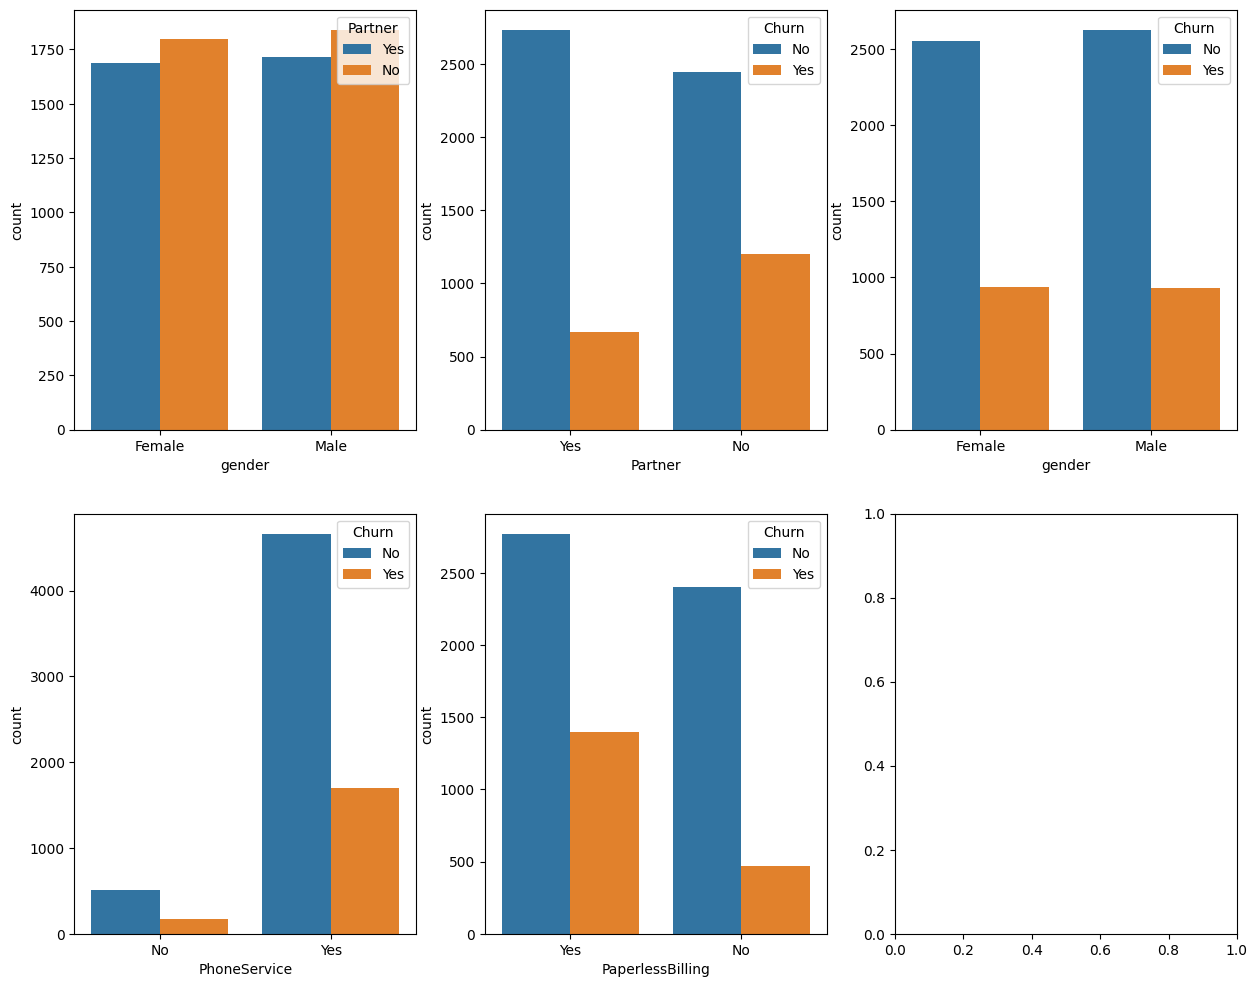

In [ ]:
#membuat crosstab chart
fig, ax = plt.subplots(2,3, figsize=(15,12))

sns.countplot(x='gender', hue='Partner', data=df, ax=ax[0, 0])
sns.countplot(x='gender', hue='Churn', data=df, ax=ax[0, 2])
sns.countplot(x='Partner', hue='Churn', data=df, ax=ax[0, 1])
sns.countplot(x='PhoneService', hue='Churn', data=df, ax=ax[1, 0])
sns.countplot(x='PaperlessBilling', hue='Churn', data=df, ax=ax[1, 1])

plt.show()

chart-1 Laki-laki dan perempuan banyak yang belum berstatus menikah

chart-2 Pelanggan berstatus menikah dab tidak menikah cenderung tidak berlangganan layanan

chart-3 Laki-laki dan Perempuan cenderung tidak kembali berlangganan layanan

chart-4 Pelanggan dengan berlangganan phoneservice cenderung banyak yang berhenti berlangganan layanan

## 3 Preprocessing

Lakukan preprocessing data churn!

In [ ]:
# cek missing value
df.isnull().sum()

gender              0
Partner             0
tenure              0
PhoneService        0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Tidak ada missing value yang terdeteksi

In [ ]:
kategori = ['gender','Partner', 'PhoneService', 'PaperlessBilling', 'Churn']
df_cat = df[kategori]
df_cat.head()

,gender,Partner,PhoneService,PaperlessBilling,Churn
0,Female,Yes,No,Yes,No
1,Male,No,Yes,No,No
2,Male,No,Yes,Yes,Yes
3,Male,No,No,No,No
4,Female,No,Yes,Yes,Yes


In [ ]:
# Ubah kedalam bentuk numerik
encoded_data = LabelEncoder()

for feature in kategori:
        if feature in df.columns.values:
            df[feature] = encoded_data.fit_transform(df[feature])

df.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,0,1,1,0,1,29.85,0
1,1,0,34,1,0,56.95,0
2,1,0,2,1,1,53.85,1
3,1,0,45,0,0,42.30,0
4,0,0,2,1,1,70.70,1


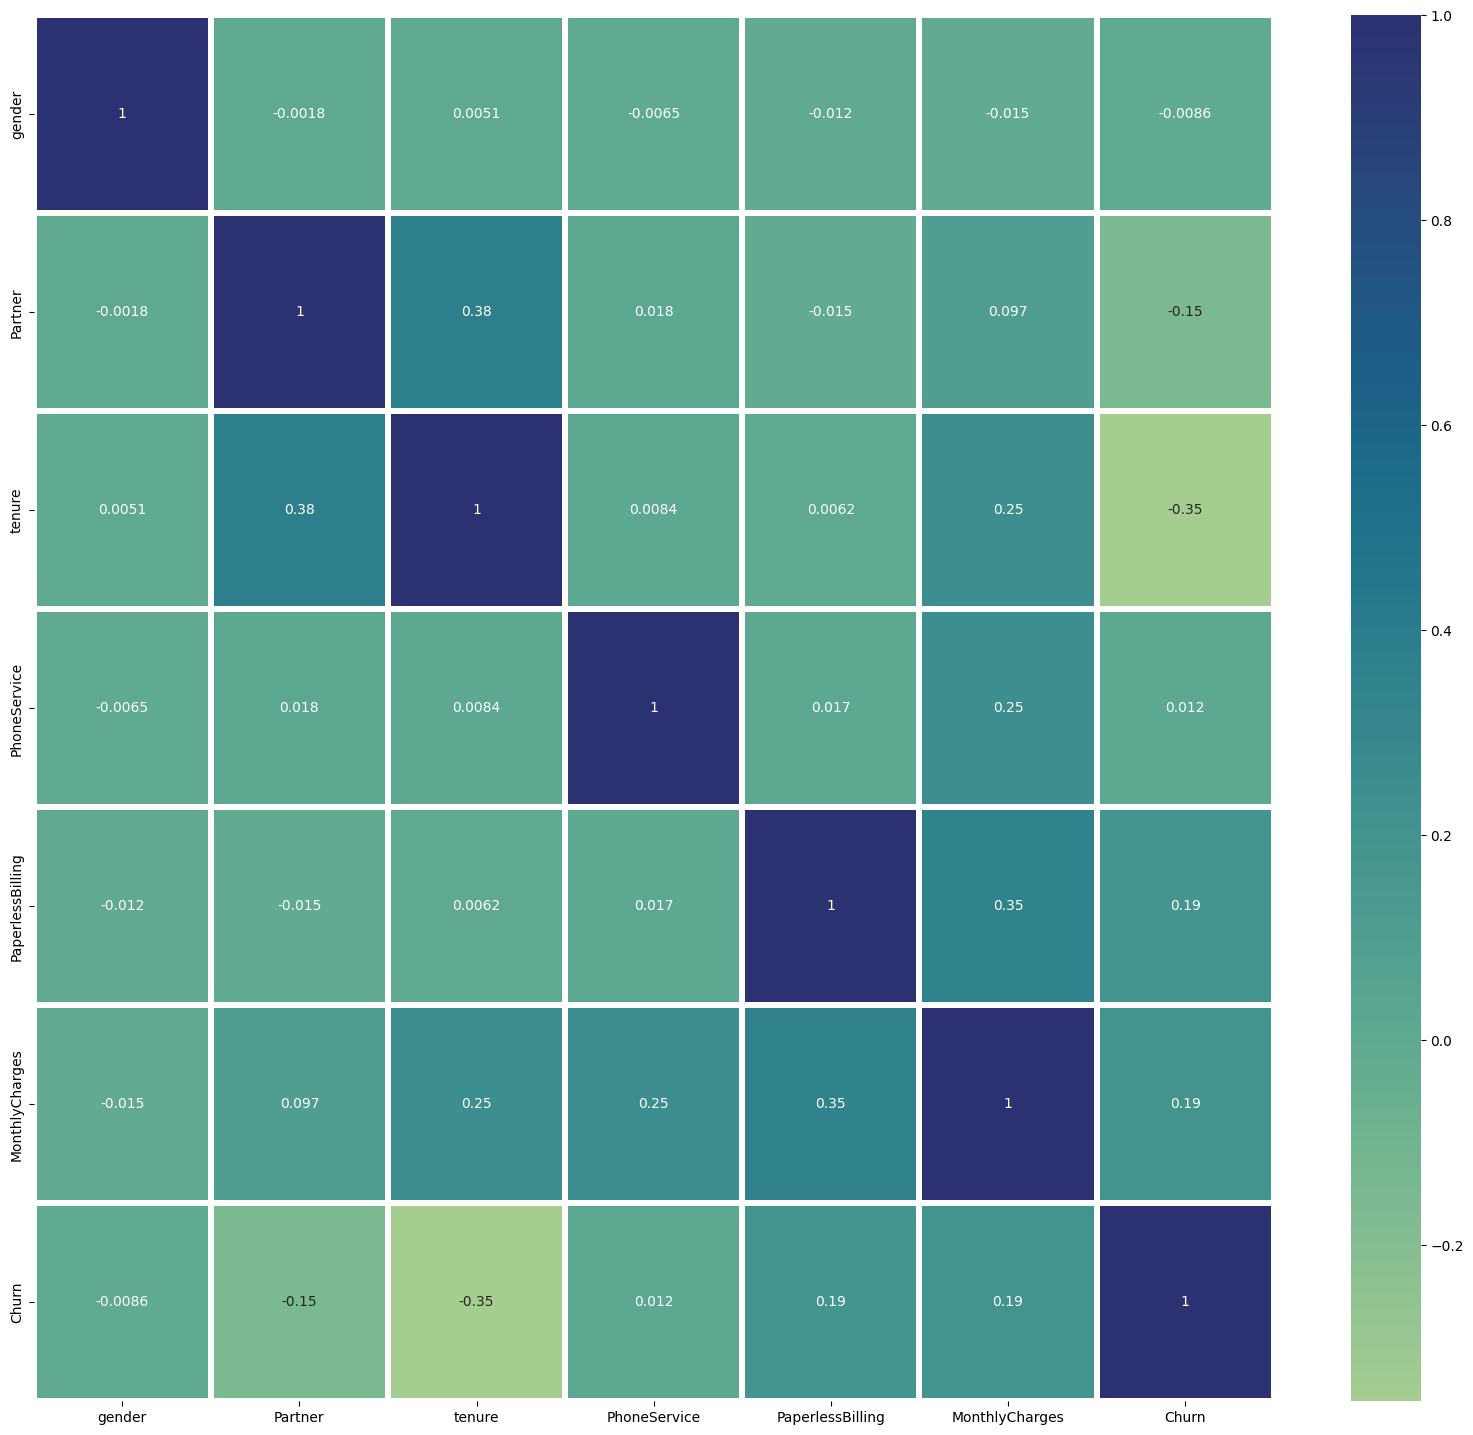

In [ ]:
# Cek korelasi, mengasumsikan bahwa data bertime interval-rasio
#Using Pearson Correlation
plt.figure(figsize=(20,18))
cor = df.corr()
sns.heatmap(cor, linewidths=3, annot=True, cmap="crest")
plt.show()


In [ ]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = df.corr()["Churn"].sort_values()
korelasi

tenure             -0.352229
Partner            -0.150448
gender             -0.008612
PhoneService        0.011942
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

## 5. Membangun Model Klasifikasi

MEMBAGI TRAIN TEST DATA

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("t Test : ", len(y_test))

X Train :  4930
y Train :  4930
X Test :  2113
t Test :  2113


Menggunakan data testing berjumlah 30% dari total data, dan data training berjumlah 70% dari total data.

### Stats Model (Logistic Regression)

In [ ]:
Input = sm.add_constant(X_train)

In [ ]:
model = sm.Logit(y_train, X_train, missing='drop')
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.457227
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.206      
Dependent Variable: Churn            AIC:              4520.2572  
Date:               2023-04-09 00:00 BIC:              4559.2757  
No. Observations:   4930             Log-Likelihood:   -2254.1    
Df Model:           5                LL-Null:          -2838.9    
Df Residuals:       4924             LLR p-value:      1.1780e-250
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
gender            -0.2272   0.0704  -3.2269 0.0013 -0.3652 -0.0892
Partner           -0.1888   0.0785  -2.4052 0.0162 -0

In [ ]:
# odds ratio
round(np.exp(result.params), 3)

gender              0.797
Partner             0.828
tenure              0.946
PhoneService        0.205
PaperlessBilling    1.435
MonthlyCharges      1.029
dtype: float64

Bagaimana akurasi model logistic regression dengan stats model?

In [ ]:
prediction = result.predict(X_test)

In [ ]:
pred_results = pd.DataFrame(prediction, columns = ["logreg_pred"])
pred_results["prediksi"] = pred_results['logreg_pred'].apply(lambda x: 1 if x > 0.5 else 0)
pred_results['actual'] = y_test
pred_results.head()

,logreg_pred,prediksi,actual
185,0.694126,1,1
2715,0.047231,0,0
3825,0.016265,0,0
1807,0.627099,1,1
132,0.016522,0,0


In [ ]:
#evaluasi model
print('Test accuracy =  {:.3f}'.format(accuracy_score(pred_results['actual'], pred_results["prediksi"])))
print('Test precision =  {:.3f}'.format(precision_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test recall =  {:.3f}'.format(recall_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test f-score =  {:.3f}'.format(f1_score(pred_results['actual'], pred_results["prediksi"], average='binary')))

Test accuracy =  0.787
Test precision =  0.626
Test recall =  0.531
Test f-score =  0.575


### SKLEARN (Logistic Regression)

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

Bagaimana akurasi model regresi logistik dengan SKLEARN?

In [ ]:
y_pred = LR.predict(X_test)
logreg_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
logreg_test['prediction'] = y_pred
logreg_test.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,prediction
185,0,1,1,0,1,24.80,1,0
2715,1,0,41,1,1,25.25,0,0
3825,0,1,52,1,0,19.35,0,0
1807,0,0,1,1,0,76.35,1,1
132,1,0,67,1,0,50.55,0,0


In [ ]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(LR.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.788
Accuracy of logistic regression classifier test data: 0.790


### Model Validation Logistic Regression SKLEARN

Bagaimana hasil model validation dengan KFold, StratifiedKFold, dan GridSearchCV?

Cross validation Kfold

In [ ]:
# Memilih k-fold (dipilih k = 5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
scores = cross_val_score(logreg, X_train, y_train, cv=kfold)
print("Cross-validation scores: {:.3f}".format(scores.mean()))

Cross-validation scores: 0.786


In [ ]:
param_grid_lr = { 'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'class_weight':['balanced', None]}

grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=kfold)
grid_search_lr.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.3}".format(grid_search_lr.best_score_))

Best parameters: {'C': 0.01, 'class_weight': None}
Best cross-validation score: 0.787


Terjadi peningkatan model score ketika dilakukan tuning parameter.

In [ ]:
scoring = {'acc': 'accuracy',
           'F1': 'f1',
           'prec': 'precision',
           'recall':'recall'}
 
acc = []
f1 = []
prec = []
recall = []
 
logreg = LogisticRegression(C = 10)
scores = cross_validate(logreg, X, y, cv=kfold, scoring=scoring)
 
acc.append(scores['test_acc'].mean())
f1.append(scores['test_F1'].mean())
prec.append(scores['test_prec'].mean())
recall.append(scores['test_recall'].mean())
 
print("Accuracy scores: ", acc)
print("f1 scores: ", f1)
print("Precision scores: ", prec)
print("Recall scores: ", recall)

Accuracy scores:  [0.7877314665462288]
f1 scores:  [0.5373495361155265]
Precision scores:  [0.6364348930292553]
Recall scores:  [0.46521464817865327]


In [ ]:
# Terapkan pada data test
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
 
print("Accuracy score: ", accuracy_score(predictions, y_test))
print("Recall score: ", recall_score(predictions, y_test))

Accuracy score:  0.7903454803596782
Recall score:  0.6601466992665037


In [ ]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.788
Accuracy of logistic regression classifier test data: 0.790


Tidak ada perbedaan yang signifikan antara train dan test data disimpulkan bahwa model tidak mengalami underfitting dan overfitting

Stratified k-fold cross validation

In [ ]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
scores = cross_val_score(logreg, X_train, y_train, cv=skfold)
print("Stratified K-Fold Cross-validation scores: {:.3f}".format(scores.mean()))

Stratified K-Fold Cross-validation scores: 0.787


In [ ]:
param_grid_lr = { 'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'class_weight':['balanced', None]}

grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=skfold)
grid_search_lr.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.3}".format(grid_search_lr.best_score_))

Best parameters: {'C': 0.01, 'class_weight': None}
Best cross-validation score: 0.788


In [ ]:
scoring = {'acc': 'accuracy',
           'F1': 'f1',
           'prec': 'precision',
           'recall':'recall'}
 
acc = []
f1 = []
prec = []
recall = []
 
logreg = LogisticRegression(C = 10)
scores = cross_validate(logreg, X, y, cv=skfold, scoring=scoring)
 
acc.append(scores['test_acc'].mean())
f1.append(scores['test_F1'].mean())
prec.append(scores['test_prec'].mean())
recall.append(scores['test_recall'].mean())
 
print("Accuracy scores: ", acc)
print("f1 scores: ", f1)
print("Precision scores: ", prec)
print("Recall scores: ", recall)

Accuracy scores:  [0.786308592489838]
f1 scores:  [0.5361687423148789]
Precision scores:  [0.631412071486998]
Recall scores:  [0.4660047884618142]


In [ ]:
# Terapkan pada data test
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
 
print("Accuracy score: ", accuracy_score(predictions, y_test))
print("Recall score: ", recall_score(predictions, y_test))

Accuracy score:  0.7903454803596782
Recall score:  0.6601466992665037


In [ ]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.788
Accuracy of logistic regression classifier test data: 0.790


### SVM

In [ ]:
# Create a svm Classifier
clf = SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)

SVC(kernel='linear')

Bagaimana akurasi model SVM?

In [ ]:
print('Accuracy of svm classifier:{:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy of svm classifier:{:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of svm classifier:0.785
Accuracy of svm classifier:0.794


### Model Validation SVM

Bagaimana hasil model validation dengan KFold, StratifiedKFold, dan GridSearchCV?

Model Validasi dengan Cross validation

In [ ]:
# Memilih k-fold (dipilih k = 5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=kfold)
print('Cross-validation scores: {:.3f}'.format(scores.mean()))

Cross-validation scores: 0.781


 Model Validasi dengan Stratified k-fold cross validation

In [ ]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=skfold)
print("Stratified K-Fold Cross-validation scores: {:.3f}".format(scores.mean()))

Stratified K-Fold Cross-validation scores: 0.782


Model validasi GridSearchCV

In [ ]:
# Menggunakan GridSearchCV dan cross-validation dalam model SVM
param_grid_svm = [{'kernel': ['rbf'],
'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
{'kernel': ['linear'],
'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
grid_search_svm = GridSearchCV(clf, param_grid_svm,cv=kfold)
grid_search_svm.fit(X, y)
print('Best parameters:{}'.format(grid_search_svm.best_params_))
print('Best GridSearchCV validation score:{:.3}'.format(grid_search_svm.best_score_))

Best parameters:{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best GridSearchCV validation score:0.793


In [ ]:
scoring = {'acc': 'accuracy',
           'F1': 'f1',
           'prec': 'precision',
           'recall':'recall'}
 
acc = []
f1 = []
prec = []
recall = []
 
clf = SVC(C=1, kernel='rbf', gamma=0.01)
clf.fit(X_train, y_train)
scores = cross_validate(logreg, X, y, cv=kfold, scoring=scoring)


 
acc.append(scores['test_acc'].mean())
f1.append(scores['test_F1'].mean())
prec.append(scores['test_prec'].mean())
recall.append(scores['test_recall'].mean())
 
print("Accuracy scores: ", acc)
print("f1 scores: ", f1)
print("Precision scores: ", prec)
print("Recall scores: ", recall)

Accuracy scores:  [0.7877314665462288]
f1 scores:  [0.5373495361155265]
Precision scores:  [0.6364348930292553]
Recall scores:  [0.46521464817865327]


In [ ]:
print('Accuracy of svm classifier:{:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy of svm classifier:{:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of svm classifier:0.796
Accuracy of svm classifier:0.788


### Coba algoritma lain(Decision Tree)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

#membuat prediksi pada data uji
y_pred = model.predict(X_test)

#menghitung akurasi dan matriks kebingungan
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print ("Accuracy : ", accuracy)
print("Confusion Matrix :\n", cm)

Accuracy :  0.7150970184571699
Confusion Matrix :
 [[1231  308]
 [ 294  280]]


In [ ]:
from sklearn import tree
import graphviz

In [ ]:
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X_train.columns,
                                #class_names=y_train,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph